# Imports 

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from time import perf_counter
import numpy as np
import random
import matplotlib.pyplot as plt

# Mnist dataset Load

Load Mnist

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

Scale down pixel values from [0,255] to [0,1]

In [6]:
X /= 255.0

Split sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
def plot_example(X, Y, n_examples = 3):
    """Plot random n_examples from training set"""
    instances = random.sample(range(0, X.shape[0] - 1), n_examples)
    for i, random_instance in enumerate(instances):
        img = X[random_instance].reshape(28, 28)
        y = Y[random_instance]
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

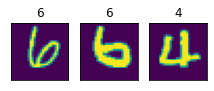

In [9]:
plot_example(X_train, y_train)

In [10]:
X_train.shape

(52500, 784)

# Conventional Training

In [11]:
def simple_model():

    inp = tf.keras.Input((784,))

    x = tf.keras.layers.Dense(16, activation='relu')(inp)
    x = tf.keras.layers.Dropout(0.05)(x)
    out = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(
        inputs=inp,
        outputs=out,
    )

    return model

In [12]:
model = simple_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
              )

fit_params = {'batch_size': 256, 'epochs': 15, 'verbose': 1}

2022-09-11 15:22:43.912497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-11 15:22:43.918573: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
tic = perf_counter()
history = model.fit(X_train, y_train, **fit_params)
training_time = perf_counter() - tic

Epoch 1/15
206/206 [==============================] - 5s 3ms/step - loss: 2.2767 - sparse_categorical_accuracy: 0.2597
Epoch 2/15
206/206 [==============================] - 1s 3ms/step - loss: 2.1649 - sparse_categorical_accuracy: 0.4542
Epoch 3/15
206/206 [==============================] - 1s 3ms/step - loss: 1.9836 - sparse_categorical_accuracy: 0.5018
Epoch 4/15
206/206 [==============================] - 0s 2ms/step - loss: 1.7842 - sparse_categorical_accuracy: 0.5506
Epoch 5/15
206/206 [==============================] - 1s 3ms/step - loss: 1.6047 - sparse_categorical_accuracy: 0.5924
Epoch 6/15
206/206 [==============================] - 1s 4ms/step - loss: 1.4524 - sparse_categorical_accuracy: 0.6224
Epoch 7/15
206/206 [==============================] - 1s 3ms/step - loss: 1.3217 - sparse_categorical_accuracy: 0.6540
Epoch 8/15
206/206 [==============================] - 1s 3ms/step - loss: 1.2143 - sparse_categorical_accuracy: 0.6735
Epoch 9/15
206/206 [============================

0.7547428607940674

In [24]:
train_accuracy = round(history.history['sparse_categorical_accuracy'][-1],2)
print(f'Total training time: {round(training_time,2)} secs with train accuracy: {train_accuracy}')

Total training time: 19.59 secs with train accuracy: 0.75


In [25]:
predictions = np.argmax(model.predict(X_test), axis=1)

547/547 [==============================] - 1s 2ms/step


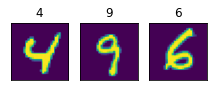

In [26]:
plot_example(X_test, predictions)